In [31]:
#!pip3 install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 500)

coding_rate = {0: 4/5,
                1: 4/5,
                2: 4/5,
                3: 4/5,
                4: 4/5,
                5: 4/5,
                8: 1/3,
                9: 2/3,
                10: 1/3,
                11: 2/3}

bitrate = {0: 250, 1: 440, 2: 980 ,3: 1760, 4: 3125 , 5: 5470} #bits/s

df = pd.read_csv('simulation_data.csv', index_col=False)
df['eff_bitrate_mean_set_1'] = (df['payload_size']*df['rx_pkts_mean_set_1']*df['cr_set_1'])*8/3600
df['eff_bitrate_std_set_1'] = (df['payload_size']*df['rx_pkts_std_set_1']*df['cr_set_1'])*8/3600
df


,Unnamed: 0,type,annulus_width,devices_set_1,devices_set_2,dr_set_1,dr_set_2,mod_set_1,mod_set_2,cr_set_1,...,tx_pkts_std_set_1,tx_pkts_mean_set_2,tx_pkts_std_set_2,rx_pkts_mean_set_1,rx_pkts_std_set_1,rx_pkts_mean_set_2,rx_pkts_std_set_2,payload_size,eff_bitrate_mean_set_1,eff_bitrate_std_set_1
0,0,DISTANCE,0,50,1,0,0,CSS,CSS,0.8,...,44.013899,36.466667,6.453595,775.600000,23.149658,15.900000,3.681938,10,13.788444,0.411549
1,1,DISTANCE,0,50,10,0,0,CSS,CSS,0.8,...,37.587527,365.900000,23.557518,679.600000,19.934225,134.066667,11.171193,10,12.081778,0.354386
2,2,DISTANCE,0,50,50,0,0,CSS,CSS,0.8,...,41.698987,1848.066667,34.655383,341.333333,16.426266,335.500000,17.442764,10,6.068148,0.292023
3,3,DISTANCE,0,50,100,0,0,CSS,CSS,0.8,...,36.082067,3677.500000,62.904557,141.033333,12.297651,287.766667,16.835841,10,2.507259,0.218625
4,4,DISTANCE,0,50,300,0,0,CSS,CSS,0.8,...,53.836470,10995.166667,110.372425,4.933333,2.264705,30.800000,3.876424,10,0.087704,0.040261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,1855,POWER,6,50,1,5,9,CSS,FHSS,0.8,...,256.400921,33.266667,4.661426,20121.966667,150.366105,28.266667,4.381273,10,357.723852,2.673175
1856,1856,POWER,6,50,10,5,9,CSS,FHSS,0.8,...,222.851271,335.866667,14.659998,18852.200000,135.403939,286.366667,16.594142,10,335.150222,2.407181
1857,1857,POWER,6,50,50,5,9,CSS,FHSS,0.8,...,186.170653,1674.400000,47.531463,14174.766667,237.647033,1419.866667,45.042745,10,251.995852,4.224836
1858,1858,POWER,6,50,100,5,9,CSS,FHSS,0.8,...,185.051272,3374.733333,44.350072,9925.266667,123.862271,2853.333333,43.388427,10,176.449185,2.201996


In [ ]:
df_100_devs = df[(df['type'] == 'POWER') & 
                    (df['lora_e_devices'] == 100)].sort_values(by='annulus_width')

for lora_dr in df['lora_dr'].unique():
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f'Capture effect on LoRa DR{lora_dr} with 100 devices')
    ax.set_xticks(df_100_devs['annulus_width'].unique())
    ax.grid(True, 'both')
    ax.set_xlabel('annulus width (dB)')
    ax.set_ylabel('Eff. LoRa Bitrate')
    for lora_e_dr in df_100_devs['lora_e_dr'].unique():
        df_100_devs_lora_E_dr = df_100_devs[(df_100_devs['lora_dr'] == lora_dr) &
                                                (df_100_devs['lora_e_dr'] == lora_e_dr)]                      
        ax.plot(df_100_devs['annulus_width'].unique(), df_100_devs_lora_E_dr['lora_eff_bitrate'], marker='.', label=f'DR={lora_e_dr}')
    ax.legend()
    plt.show() 


# LoRa vs LoRa 
### LoRa effect on 50 LoRa devices' bitrate for different annulus widths per distance and power distribution

In [ ]:

axes_positions_per_dr = {0: (0,0), 1:(0,1), 2:(1,0), 3: (1,1), 4:(2,0), 5:(2,1)}

lora_vs_lora = (df['mod_set_1'] == 'CSS') & (df['mod_set_2'] == 'CSS')
df = df[lora_vs_lora]

for distribution in df['type'].unique():
    df_distrib = df[df['type'] == distribution]
    for annulus_width in df_distrib['annulus_width'].unique():
        df_distrib_width = df_distrib[df_distrib['annulus_width'] == annulus_width]
        fig, axes = plt.subplots(3,2,figsize=(17,20))
        fig.suptitle(f'{annulus_width}dB distributed by {distribution}', fontsize=20)
        for dr_set_1 in df_distrib_width['dr_set_1'].unique():
            df_distrib_width_dr1 = df_distrib_width[df_distrib_width['dr_set_1'] == dr_set_1]
            axes[axes_positions_per_dr[dr_set_1]].set_title(f'DR{dr_set_1}', fontsize=18)
            for dr_set_2 in df_distrib_width_dr1['dr_set_2'].unique():
                df_distrib_width_dr1_dr2 = df_distrib_width_dr1[df_distrib_width_dr1['dr_set_2'] == dr_set_2]
                df_distrib_width_dr1_dr2.sort_values(by='devices_set_2', inplace=True)
                #plot lines (mean)
                axes[axes_positions_per_dr[dr_set_1]].plot(df_distrib_width_dr1_dr2['devices_set_2'],df_distrib_width_dr1_dr2['eff_bitrate_mean_set_1'], label=f'DR{dr_set_2}', marker='.', markersize=9)
                #plot error (std)
                axes[axes_positions_per_dr[dr_set_1]].fill_between( df_distrib_width_dr1_dr2['devices_set_2'],
                                                                    df_distrib_width_dr1_dr2['eff_bitrate_mean_set_1'] + ((
                                                                        df_distrib_width_dr1_dr2['rx_pkts_std_set_1']*
                                                                        df_distrib_width_dr1_dr2['payload_size']*
                                                                        df_distrib_width_dr1_dr2['cr_set_1'])*8/3600),
                                                                    df_distrib_width_dr1_dr2['eff_bitrate_mean_set_1'] - ((
                                                                        df_distrib_width_dr1_dr2['rx_pkts_std_set_1']*
                                                                        df_distrib_width_dr1_dr2['payload_size']*
                                                                        df_distrib_width_dr1_dr2['cr_set_1'])*8/3600),
                                                                    alpha=0.2)                                                 
            axes[axes_positions_per_dr[dr_set_1]].set_xlabel('Num. added LoRa devices', fontsize=14)
            axes[axes_positions_per_dr[dr_set_1]].set_ylabel('Effective bitrate (b/s)', fontsize=14)
            axes[axes_positions_per_dr[dr_set_1]].grid(True, which='both', alpha=0.5)
            axes[axes_positions_per_dr[dr_set_1]].legend()
          


# LoRa vs LoRa-E comparison

In [ ]:

axes_positions_per_dr = {0: (0,0), 1:(0,1), 2:(1,0), 3: (1,1), 4:(2,0), 5:(2,1)}


for distribution in df['type'].unique():
    df_distrib = df[df['type'] == distribution]
    for annulus_width in df_distrib['annulus_width'].unique():
        df_distrib_width = df_distrib[df_distrib['annulus_width'] == annulus_width]
        fig, axes = plt.subplots(3,2,figsize=(17,20))
        fig.suptitle(f'{annulus_width}dB distributed by {distribution}', fontsize=20)
        for dr_set_1 in df_distrib_width['dr_set_1'].unique():
            ax = axes[axes_positions_per_dr[dr_set_1]]
            df_distrib_width_dr1 = df_distrib_width[df_distrib_width['dr_set_1'] == dr_set_1]
            ax.set_title(f'DR{dr_set_1}', fontsize=18)
            for dr_set_2 in df_distrib_width_dr1[df_distrib_width_dr1['mod_set_2']=='FHSS']['dr_set_2'].unique():
                #Plot eff bitrate with DR8 and DR9 devices
                df_distrib_width_dr1_dr2 = df_distrib_width_dr1[df_distrib_width_dr1['dr_set_2'] == dr_set_2]
                df_distrib_width_dr1_dr2.sort_values(by='devices_set_2', inplace=True)
                #plot lines (mean)
                ax.plot(df_distrib_width_dr1_dr2['devices_set_2'],df_distrib_width_dr1_dr2['eff_bitrate_mean_set_1'], 
                        label=f'DR{dr_set_2}', marker='.', markersize=9)
                #plot error (std)
                ax.fill_between( df_distrib_width_dr1_dr2['devices_set_2'],
                                    df_distrib_width_dr1_dr2['eff_bitrate_mean_set_1'] + ((
                                        df_distrib_width_dr1_dr2['rx_pkts_std_set_1']*
                                        df_distrib_width_dr1_dr2['payload_size']*
                                        df_distrib_width_dr1_dr2['cr_set_1'])*8/3600),
                                    df_distrib_width_dr1_dr2['eff_bitrate_mean_set_1'] - ((
                                        df_distrib_width_dr1_dr2['rx_pkts_std_set_1']*
                                        df_distrib_width_dr1_dr2['payload_size']*
                                        df_distrib_width_dr1_dr2['cr_set_1'])*8/3600),
                                    alpha=0.2)       

            #Plot eff bitrate with auto-interferent devices (same DR)
            df_distrib_width_dr1_dr2 = df_distrib_width_dr1[df_distrib_width_dr1['dr_set_2'] == dr_set_1]
            df_distrib_width_dr1_dr2.sort_values(by='devices_set_2', inplace=True)
            #plot lines (mean)
            
            ax.plot(df_distrib_width_dr1_dr2['devices_set_2'], df_distrib_width_dr1_dr2['eff_bitrate_mean_set_1'], 
                    label=f'DR{dr_set_1}', marker='.', markersize=9)
            #plot error (std)
            ax.fill_between(df_distrib_width_dr1_dr2['devices_set_2'],
                            df_distrib_width_dr1_dr2['eff_bitrate_mean_set_1'] + ((
                                df_distrib_width_dr1_dr2['rx_pkts_std_set_1']*
                                df_distrib_width_dr1_dr2['payload_size']*
                                df_distrib_width_dr1_dr2['cr_set_1'])*8/3600),
                            df_distrib_width_dr1_dr2['eff_bitrate_mean_set_1'] - ((
                                df_distrib_width_dr1_dr2['rx_pkts_std_set_1']*
                                df_distrib_width_dr1_dr2['payload_size']*
                                df_distrib_width_dr1_dr2['cr_set_1'])*8/3600),
                            alpha=0.2)     
            ax.set_xlabel('Num. added devices', fontsize=14)
            ax.set_ylabel('50 LoRa devices effective bitrate (b/s)', fontsize=14)
            ax.grid(True, which='both', alpha=0.5)
            ax.legend()
                


# Effective bitrate loss for 50 LoRa devices for each LoRa DR and LoRa-E DR

### Plots show effective bitrate relative losses to 50 LoRa devices as devices with same DR, DR8 or DR9 are added.

C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\p

IndexError: index 0 is out of bounds for axis 0 with size 0

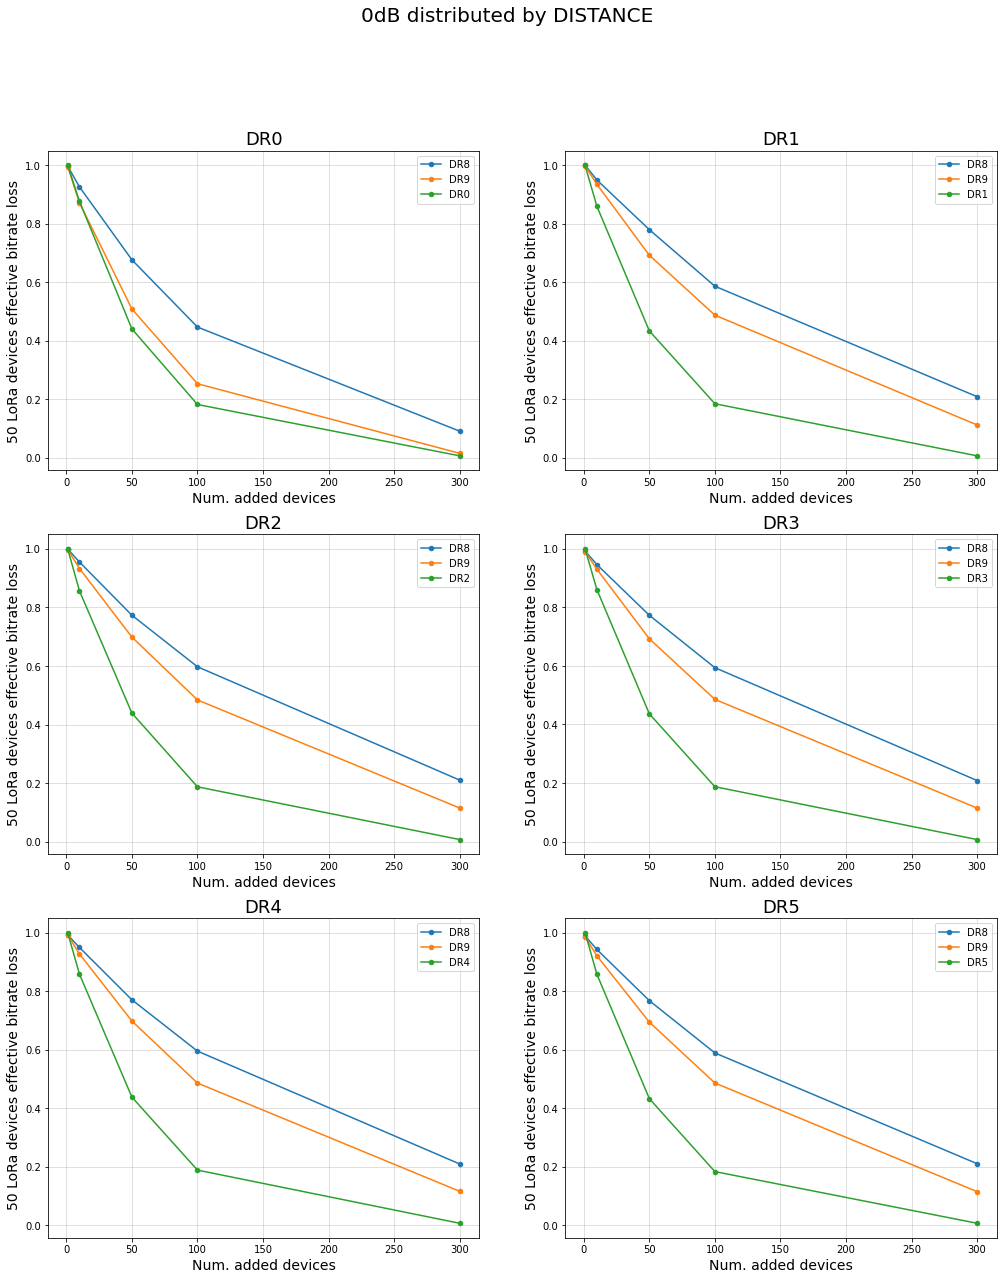

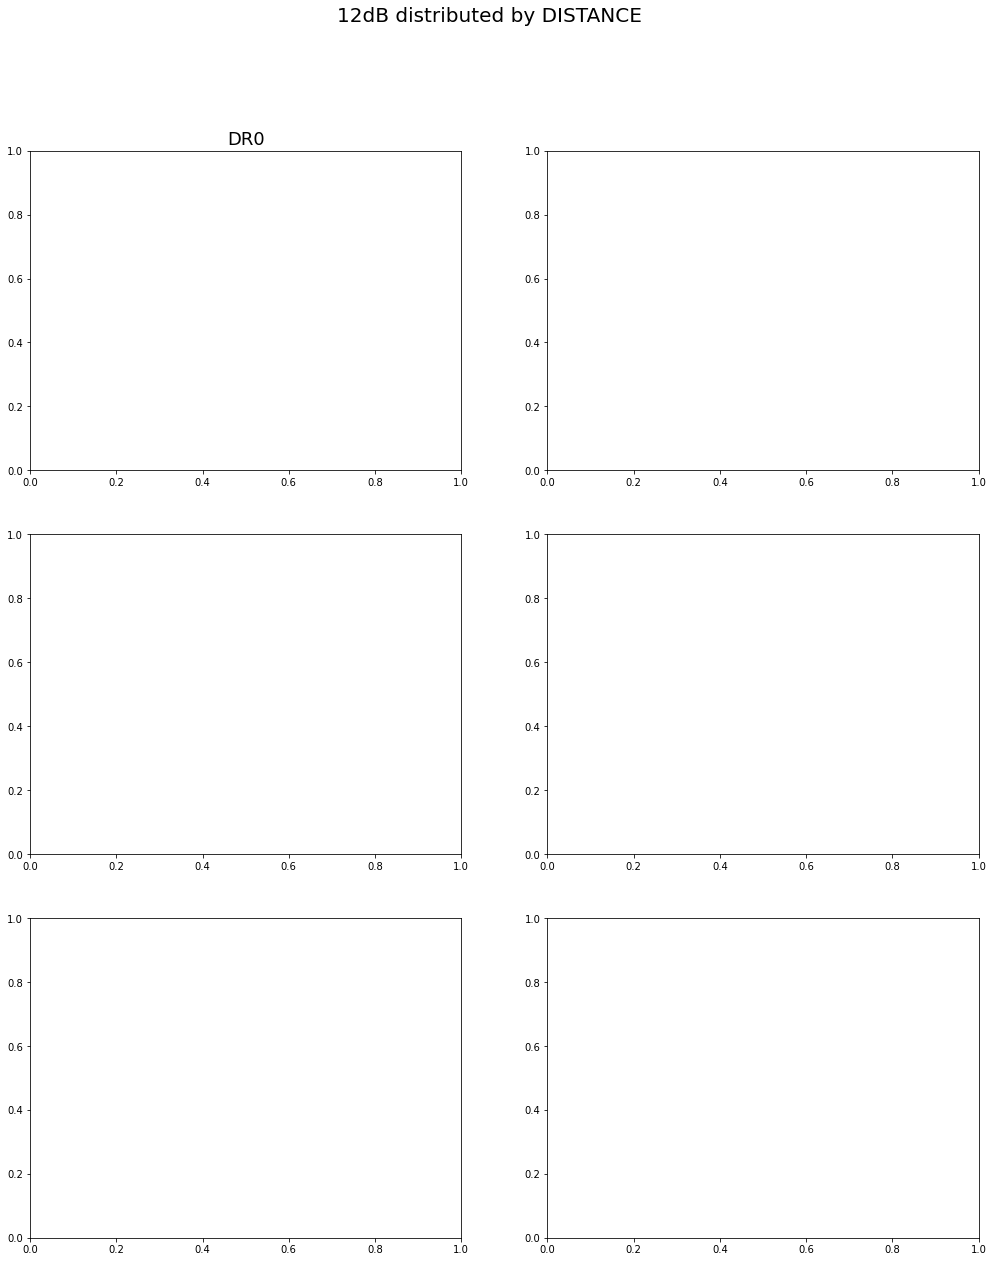

In [41]:

axes_positions_per_dr = {0: (0,0), 1:(0,1), 2:(1,0), 3: (1,1), 4:(2,0), 5:(2,1)}


for distribution in df['type'].unique():
    df_distrib = df[df['type'] == distribution]
    for annulus_width in df_distrib['annulus_width'].unique():
        df_distrib_width = df_distrib[df_distrib['annulus_width'] == annulus_width]
        fig, axes = plt.subplots(3,2,figsize=(17,20))
        fig.suptitle(f'{annulus_width}dB distributed by {distribution}', fontsize=20)
        for dr_set_1 in df_distrib_width['dr_set_1'].unique():
            ax = axes[axes_positions_per_dr[dr_set_1]]
            df_distrib_width_dr1 = df_distrib_width[df_distrib_width['dr_set_1'] == dr_set_1]
            ax.set_title(f'DR{dr_set_1}', fontsize=18)
            for dr_set_2 in df_distrib_width_dr1[df_distrib_width_dr1['mod_set_2']=='FHSS']['dr_set_2'].unique():
                #Plot eff bitrate with auto-interferent devices (same DR)
                df_distrib_width_dr1_dr1 = df_distrib_width_dr1[df_distrib_width_dr1['dr_set_2'] == dr_set_1]
                df_distrib_width_dr1_dr1.sort_values(by='devices_set_2', inplace=True)

                #Plot eff bitrate with DR8 and DR9 devices
                df_distrib_width_dr1_dr2 = df_distrib_width_dr1[df_distrib_width_dr1['dr_set_2'] == dr_set_2]
                df_distrib_width_dr1_dr2.sort_values(by='devices_set_2', inplace=True)

                eff_bitrate_gain = df_distrib_width_dr1_dr2['eff_bitrate_mean_set_1'].to_numpy() / df_distrib_width_dr1_dr1['eff_bitrate_mean_set_1'].to_numpy()[0]

                eff_bitrate_gain_pos =  (df_distrib_width_dr1_dr2['eff_bitrate_mean_set_1'] + df_distrib_width_dr1_dr2['eff_bitrate_std_set_1']).to_numpy() / \
                                        (df_distrib_width_dr1_dr1['eff_bitrate_mean_set_1'] + df_distrib_width_dr1_dr1['eff_bitrate_std_set_1']).to_numpy() 

                eff_bitrate_gain_neg =  (df_distrib_width_dr1_dr2['eff_bitrate_mean_set_1'] - df_distrib_width_dr1_dr2['eff_bitrate_std_set_1']).to_numpy() / \
                                        (df_distrib_width_dr1_dr1['eff_bitrate_mean_set_1'] - df_distrib_width_dr1_dr1['eff_bitrate_std_set_1']).to_numpy() 
                #plot lines (mean)
                ax.plot(df_distrib_width_dr1_dr2['devices_set_2'], eff_bitrate_gain, 
                        label=f'DR{dr_set_2}', marker='.', markersize=9)
                #plot error (std)
                '''
                ax.fill_between(df_distrib_width_dr1_dr2['devices_set_2'],
                                    eff_bitrate_gain_pos,
                                    eff_bitrate_gain_neg,
                                    alpha=0.2)       
                '''
            ax.plot(df_distrib_width_dr1_dr1['devices_set_2'], df_distrib_width_dr1_dr1['eff_bitrate_mean_set_1'].to_numpy() / df_distrib_width_dr1_dr1['eff_bitrate_mean_set_1'].to_numpy()[0], 
                        label=f'DR{dr_set_1}', marker='.', markersize=9)
            ax.set_xlabel('Num. added devices', fontsize=14)
            ax.set_ylabel('50 LoRa devices effective bitrate loss', fontsize=14)
            ax.grid(True, which='both', alpha=0.5)
            ax.legend()
                
